# Clustering Stocks based on Roa, Roe and Debt to Equity

Data processing: 
 - 1. Import data
 - 2. Removing missing values
 - 3. Remove Outliners
 - 4. Statistical summary
 - 5. Visualize & Scale the data
 - 6. Build & Run the Model
   - 6.1. Silhouette coefficients
   - 6.2. Model Evaluation
   - 6.3. Elbow Method
 - 7. Chart the Clusters
   - 7.1. Show the result of which cluster each observation belongs to
 - 8. Principal Component Analysis (PCA)
 - 9. Make Predictions
   - 9.1. Predicting with new data
   - 9.2. Predicting with available dataset

 We now possess a comprehensive data frame that encompasses all the information pertaining to our stock. For the purpose of this tutorial, we will focus on three attributes. By doing so, we aim to ensure our understanding of certain concepts before delving into higher dimensional data, as it will be easier to visualize these concepts with a smaller number of attributes.
 - Return on Assets (ROA): ROA serves as an indicator of a company's profitability in relation to its total assets. It provides managers, investors, and analysts with insights into how efficiently a company's management utilizes its assets to generate earnings. ROA is typically presented as a percentage.

- Return on Equity (ROE): ROE measures a company's financial performance by dividing its net income by shareholders' equity. Since shareholders' equity is equivalent to a company's assets minus its debt, ROE can be regarded as the return on net assets. It is considered a gauge of how effectively management utilizes a company's assets to generate profits.
- Debt-to-Equity Ratio (D/E): The debt-to-equity ratio is a financial metric that compares a company's total debt to its shareholders' equity. It provides insights into the proportion of a company's financing that comes from debt relative to equity. The ratio is calculated by dividing total debt by shareholders' equity and is often expressed as a numerical value or a percentage. 

# 1. Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('dataML.xlsx')

In [3]:
data

,Code,Roa,Roe,D/E
0,CHP.HM(WC01706),7.396778,12.779821,66.623594
1,POM.HM(WC01706),1.216015,4.944299,234.389621
2,V21.HN(WC01706),1.106718,3.071449,33.440657
3,LIG.HN(WC01706),0.985553,7.212689,207.123755
4,MCC.HN(WC01706),1.818440,2.379671,5.631124
...,...,...,...,...
734,ASM.HM(WC01706),3.304711,11.780293,155.084192
735,FDC.HM(WC01706),1.214949,1.521565,0.000000
736,KDH.HM(WC01706),7.780730,10.979191,25.059510
737,LHG.HM(WC01706),8.799220,17.108194,12.747824


# 2. Removing missing values

In [4]:
# define our indicators list
metrics_list = ['Roa','Roe','D/E','Code']

# select only those columns
df = data[metrics_list]

# display the unedited DF
display(df.head())

# eliminate any row that has a missing value.
df = df[df[metrics_list] != 0]
df = df.dropna(how='any')
 
#display clean dataset
display(df.head())

,Roa,Roe,D/E,Code
0,7.396778,12.779821,66.623594,CHP.HM(WC01706)
1,1.216015,4.944299,234.389621,POM.HM(WC01706)
2,1.106718,3.071449,33.440657,V21.HN(WC01706)
3,0.985553,7.212689,207.123755,LIG.HN(WC01706)
4,1.818440,2.379671,5.631124,MCC.HN(WC01706)


,Roa,Roe,D/E,Code
0,7.396778,12.779821,66.623594,CHP.HM(WC01706)
1,1.216015,4.944299,234.389621,POM.HM(WC01706)
2,1.106718,3.071449,33.440657,V21.HN(WC01706)
3,0.985553,7.212689,207.123755,LIG.HN(WC01706)
4,1.818440,2.379671,5.631124,MCC.HN(WC01706)


To make things more manageable, let's set the 'Code' column as the data frame index. This will make selecting certain stock symbols much easier.

In [5]:
# set the index
df = df.set_index('Code')

# convert the data frame to float
df = df.astype('float')

df.head()

,Roa,Roe,D/E
Code,,,
CHP.HM(WC01706),7.396778,12.779821,66.623594
POM.HM(WC01706),1.216015,4.944299,234.389621
V21.HN(WC01706),1.106718,3.071449,33.440657
LIG.HN(WC01706),0.985553,7.212689,207.123755
MCC.HN(WC01706),1.818440,2.379671,5.631124


# 3. Remove Outliners

<Axes: >

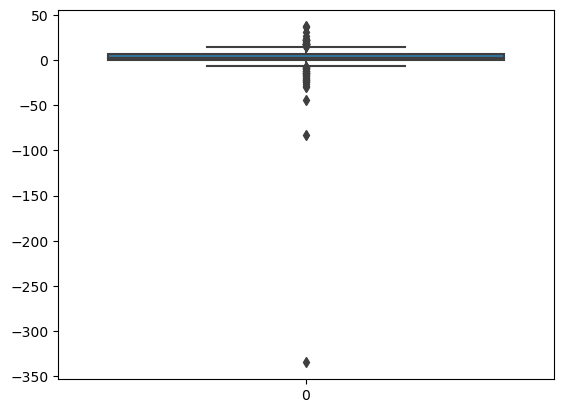

In [6]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Roa'])

<Axes: >

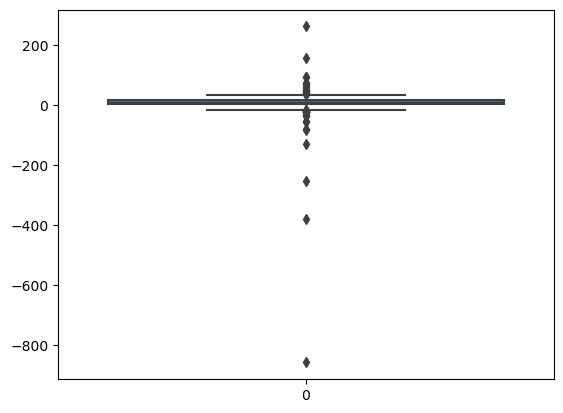

In [7]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Roe'])

<Axes: >

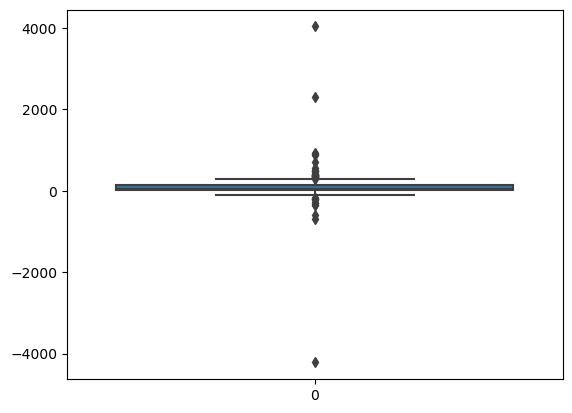

In [8]:
# Box Plot
import seaborn as sns
sns.boxplot(df['D/E'])

Using the boxplot to check whether there are outliers in the column that have skewed distribution so that we can remove or deal with them using IQR general method. Conclusively, from the box plot, we can see that there are outliers in the upper and lower  region in all three variables. 

# Remove ouliners in "Roa" 

Finding the IQR

In [9]:
percentile25 = df['Roa'].quantile(0.25)
percentile75 = df['Roa'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  6.644908413138049
25th quartile:  0.7929341815169859


The results shows that the 75th quartile is 6.6, one with 6.6 marks is just behind 75% of observations similarly, for the 25th quartile, we have 0.79 marks, the one with 0,79 marks is ahead of just 25% of observations.

In [10]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  5.851974231621063


These quartiles are used to divide a dataset into four equal parts, each containing 25% of the data. The interquartile range (IQR) can be calculated by subtracting the 25th quartile from the 75th quartile. In this case, the IQR would be 6.6 - 0.79 = 5.85.

In [11]:
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -7.985027165914608
Upper Limit: 15.422869760569643


The lower limit is -7.985027165914608, and the upper limit is 15.422869760569643.
These limits indicate the range within which the data values are considered "normal" or within an acceptable range. Any data point below the lower limit or above the upper limit may be considered an outlier or abnormal.

In [12]:
df2 = df.copy()

df2['Roa'] = np.where(
    df2['Roa'] > upper_limit,
    upper_limit,
    np.where(
        df2['Roa'] < lower_limit,
        lower_limit,
        df2['Roa']
    )
)

In [13]:
df2

,Roa,Roe,D/E
Code,,,
CHP.HM(WC01706),7.396778,12.779821,66.623594
POM.HM(WC01706),1.216015,4.944299,234.389621
V21.HN(WC01706),1.106718,3.071449,33.440657
LIG.HN(WC01706),0.985553,7.212689,207.123755
MCC.HN(WC01706),1.818440,2.379671,5.631124
...,...,...,...
IJC.HM(WC01706),8.595357,17.501906,33.589606
DXG.HM(WC01706),4.095908,13.196450,51.085237
ASM.HM(WC01706),3.304711,11.780293,155.084192


# Remove Outliners in "Roe"

In [14]:
percentile252 = df['Roe'].quantile(0.25)
percentile752 = df['Roe'].quantile(0.75)
print("75th quartile: ",percentile752)
print("25th quartile: ",percentile252)

75th quartile:  16.388732905926567
25th quartile:  3.0986738443321955


The findings indicate that the 75th quartile is 16.3, meaning that a score of 16.3 places an observation just below 75% of the data points. Similarly, for the 25th quartile, the value is 3.09, indicating that an observation with a score of 3.09 is ahead of only 25% of the observations.

In [15]:
iqr2 = percentile752 - percentile252
print ("IQR: ",iqr)

IQR:  5.851974231621063


In [16]:
lower_limit2 = percentile252 - 1.5 * iqr2
upper_limit2 = percentile752 + 1.5 * iqr2
print("Lower Limit:", lower_limit2)
print("Upper Limit:", upper_limit2)

Lower Limit: -16.83641474805936
Upper Limit: 36.323821498318125


In [17]:
df3 = df2.copy()

df3['Roe'] = np.where(
    df3['Roe'] > upper_limit2,
    upper_limit2,
    np.where(
        df3['Roe'] < lower_limit2,
        lower_limit2,
        df3['Roe']
    )
)
df3

,Roa,Roe,D/E
Code,,,
CHP.HM(WC01706),7.396778,12.779821,66.623594
POM.HM(WC01706),1.216015,4.944299,234.389621
V21.HN(WC01706),1.106718,3.071449,33.440657
LIG.HN(WC01706),0.985553,7.212689,207.123755
MCC.HN(WC01706),1.818440,2.379671,5.631124
...,...,...,...
IJC.HM(WC01706),8.595357,17.501906,33.589606
DXG.HM(WC01706),4.095908,13.196450,51.085237
ASM.HM(WC01706),3.304711,11.780293,155.084192


# Remove Ouliners in "D/E"

In [18]:
percentile253 = df['D/E'].quantile(0.25)
percentile753 = df['D/E'].quantile(0.75)
print("75th quartile: ",percentile753)
print("25th quartile: ",percentile253)

75th quartile:  127.79010734164115
25th quartile:  16.53514006596772


According to the results, it is revealed that the 75th quartile is 127.7, which implies that an observation with a score of 127.7 falls slightly below 75% of the data points. Similarly, in the case of the 25th quartile, the value is 16.5, signifying that an observation with a score of 16.5 surpasses merely 25% of the observations.

In [19]:
iqr3 = percentile753 - percentile253
print ("IQR: ",iqr)

IQR:  5.851974231621063


In [20]:
lower_limit3 = percentile252 - 1.5 * iqr3
upper_limit3 = percentile753 + 1.5 * iqr3
print("Lower Limit:", lower_limit3)
print("Upper Limit:", upper_limit3)

Lower Limit: -163.78377706917794
Upper Limit: 294.6725582551513


In [21]:
df4 = df3.copy()

df4['D/E'] = np.where(
    df4['D/E'] > upper_limit3,
    upper_limit3,
    np.where(
        df4['D/E'] < lower_limit3,
        lower_limit3,
        df4['D/E']
    )
)
df4

,Roa,Roe,D/E
Code,,,
CHP.HM(WC01706),7.396778,12.779821,66.623594
POM.HM(WC01706),1.216015,4.944299,234.389621
V21.HN(WC01706),1.106718,3.071449,33.440657
LIG.HN(WC01706),0.985553,7.212689,207.123755
MCC.HN(WC01706),1.818440,2.379671,5.631124
...,...,...,...
IJC.HM(WC01706),8.595357,17.501906,33.589606
DXG.HM(WC01706),4.095908,13.196450,51.085237
ASM.HM(WC01706),3.304711,11.780293,155.084192


After removing some of these extreme values, we are now at an excellent spot to do a statistical summary of our data set. Use the describe method to create a su.,mmary data frame and then add a standard deviation metric that is calculated using the mean.

# 4. Statistical summary

In [22]:
# create a statistical summary
df_new = df4.describe()

# add the standard deviation metric
df_new.loc['+3_std'] = df_new.loc['mean'] + (df_new.loc['std'] * 3)
df_new.loc['-3_std'] = df_new.loc['mean'] - (df_new.loc['std'] * 3)

# display it
df_new

,Roa,Roe,D/E
count,602.000000,602.000000,602.000000
mean,3.792990,9.914973,76.404110
std,5.328158,11.040884,91.558125
min,-7.985027,-16.836415,-163.783777
25%,0.792934,3.098674,16.535140
50%,2.898560,8.724234,48.209847
75%,6.644908,16.388733,127.790107
max,15.422870,36.323821,294.672558
+3_std,19.777464,43.037624,351.078484
-3_std,-12.191485,-23.207678,-198.270265


The provided statistics for Roa (Return on Assets), Roe (Return on Equity), and D/E (Debt-to-Equity ratio) offer insights into the characteristics and distribution of these variables
- Count: There are 602 data points for each variable, indicating a reasonably large sample size for analysis.

- Mean: The mean values provide an average representation of each variable's value. On average, Roa is 3.792990, Roe is 9.914973, and D/E is 76.404110. These averages can be used as a reference point for comparison with individual data points.

- Standard Deviation (Std): The standard deviation measures the dispersion or variability around the mean for each variable. A higher standard deviation suggests a wider spread of data points. In this case, Roa has a standard deviation of 5.328158, Roe has 11.040884, and D/E has 91.558125. This indicates relatively higher variability in D/E compared to Roa and Roe.
- Minimum and Maximum: The minimum and maximum values provide the range of observations for each variable. For Roa, the lowest value observed is -7.985027, and the highest is 15.422870. For Roe, the range is from -16.836415 to 36.323821. For D/E, the range is from -163.783777 to 294.672558.
- +3_std and -3_std: These values represent the upper and lower bounds, respectively, that are three standard deviations away from the mean. They provide a range within which most of the data points are expected to fall.

# 5. Visualize & Scale the data

In order to have a clear understanding of this dataset, we can move to plotting. In this case, I use 3D scatter plot to see all the data points.

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, CHP.HM(WC01706) to LHG.HM(WC01706)
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Roa     602 non-null    float64
 1   Roe     602 non-null    float64
 2   D/E     602 non-null    float64
dtypes: float64(3)
memory usage: 18.8+ KB


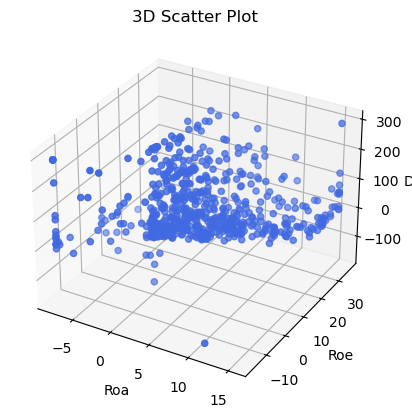

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for demonstration

x = list(df4['Roa'])
y = list(df4['Roe'])
z = list(df4["D/E"])

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three dimensions
ax.scatter(x, y, z, c='royalblue', marker='o')

# Set axis labels
ax.set_xlabel('Roa')
ax.set_ylabel('Roe')
ax.set_zlabel('D/E')

# Set plot title
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


Upon examining this data, it appears to lack a distinct spherical shape, which can pose challenges for clustering algorithms that typically rely on well-defined structures. Moving forward, let's  proceed with normalizing the data to address outliers and similar concerns. Normalizing the data is generally recommended as it tends to improve the model's performance compared to alternative approaches

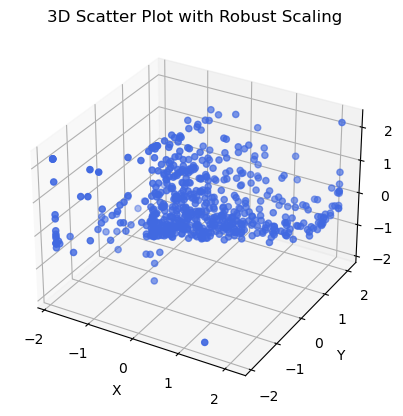

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import RobustScaler

# Generate random data for demonstration
x = list(df4['Roa'])
y = list(df4['Roe'])
z = list(df4["D/E"])

# Combine the variables into a 3D array
data = np.column_stack((x, y, z))

# Apply Robust Scaling to the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df4)

# Separate the scaled data back into individual variables
scaled_x = scaled_data[:, 0]
scaled_y = scaled_data[:, 1]
scaled_z = scaled_data[:, 2]

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three dimensions
ax.scatter(scaled_x, scaled_y, scaled_z, c='royalblue', marker='o')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot title
ax.set_title('3D Scatter Plot with Robust Scaling')

# Show the plot
plt.show()


In this step, we use Robust Scaler. This method is a good choice due to we can use the interquartile range instead of the minimum and maximum, which helps control for outliers.
By scaling the data, we are allowing our algorithm to perform better with the data

# 6. Build & Run the Model

# 6.1. Silhouette coefficients

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other.
Silhouette score, S, for each sample is calculated using the following formula:

S=(b–a)/max(a,b)
The value of Silhouette score varies from -1 to 1. 
- If the score is 1, the cluster is dense and well-separated than other clusters. 
- A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters.
- A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(scaled_data, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 2
Silhouette Score: 0.35680489977604773
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 3
Silhouette Score: 0.37148374007401475
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 4
Silhouette Score: 0.3884055380667125
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 5
Silhouette Score: 0.4164624382831319
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 6
Silhouette Score: 0.37720447538616986
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 7
Silhouette Score: 0.38282317029160684
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 8
Silhouette Score: 0.3886065727621439
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 9
Silhouette Score: 0.38375088831057985


The first thing is to consider is the overall silhouette score, where a higher value indicates better results.
Looking at the result above, 4,5 should be our target.

# 6.2. Model Evaluation

In [27]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.3528355731053282


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.37131754419125856
For n_clusters = 4 The average silhouette_score is : 0.39226019702360254


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4164353687064854
For n_clusters = 6 The average silhouette_score is : 0.3877018857890065


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.38210786318277945
For n_clusters = 8 The average silhouette_score is : 0.3902718127548988


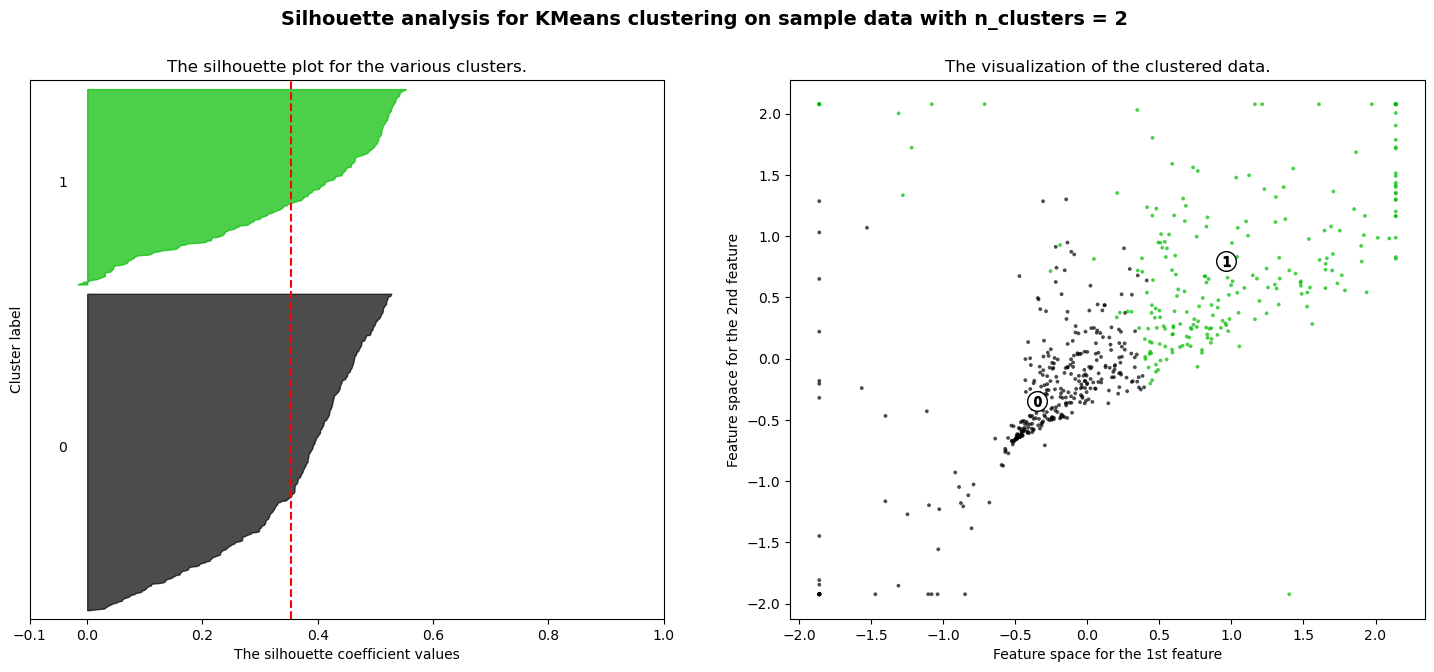

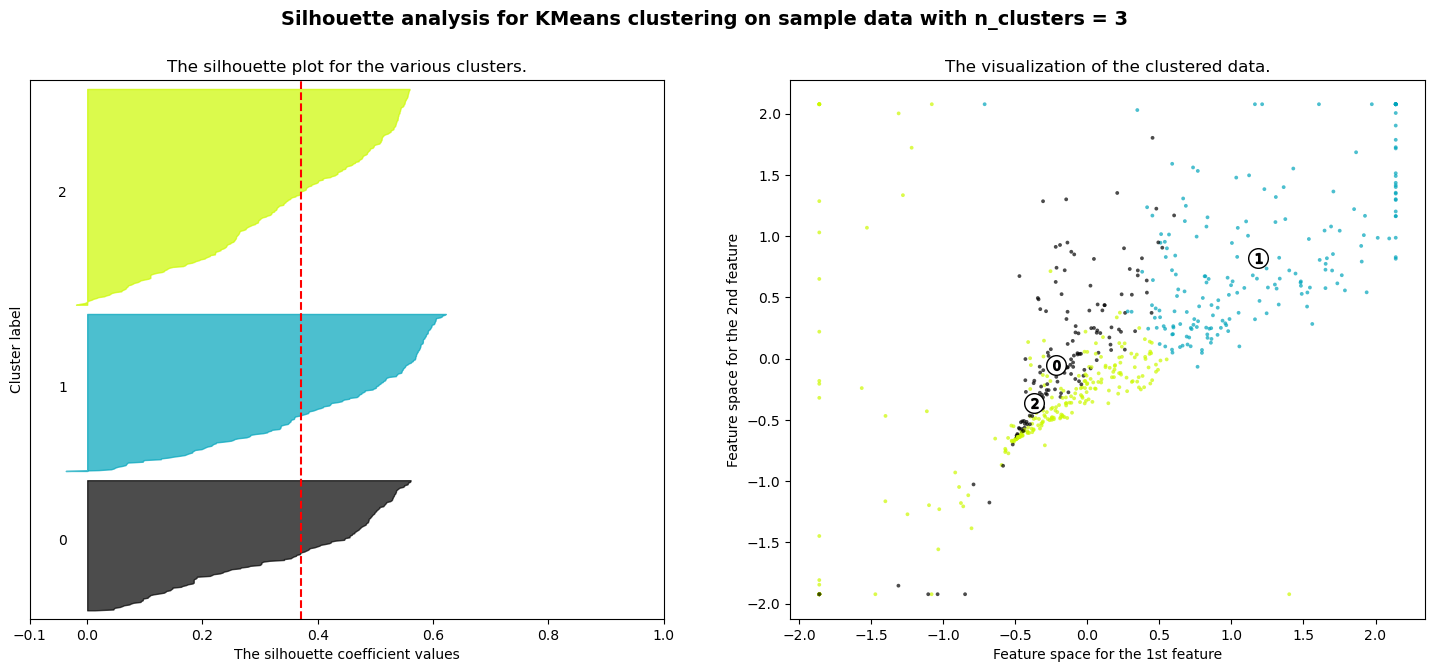

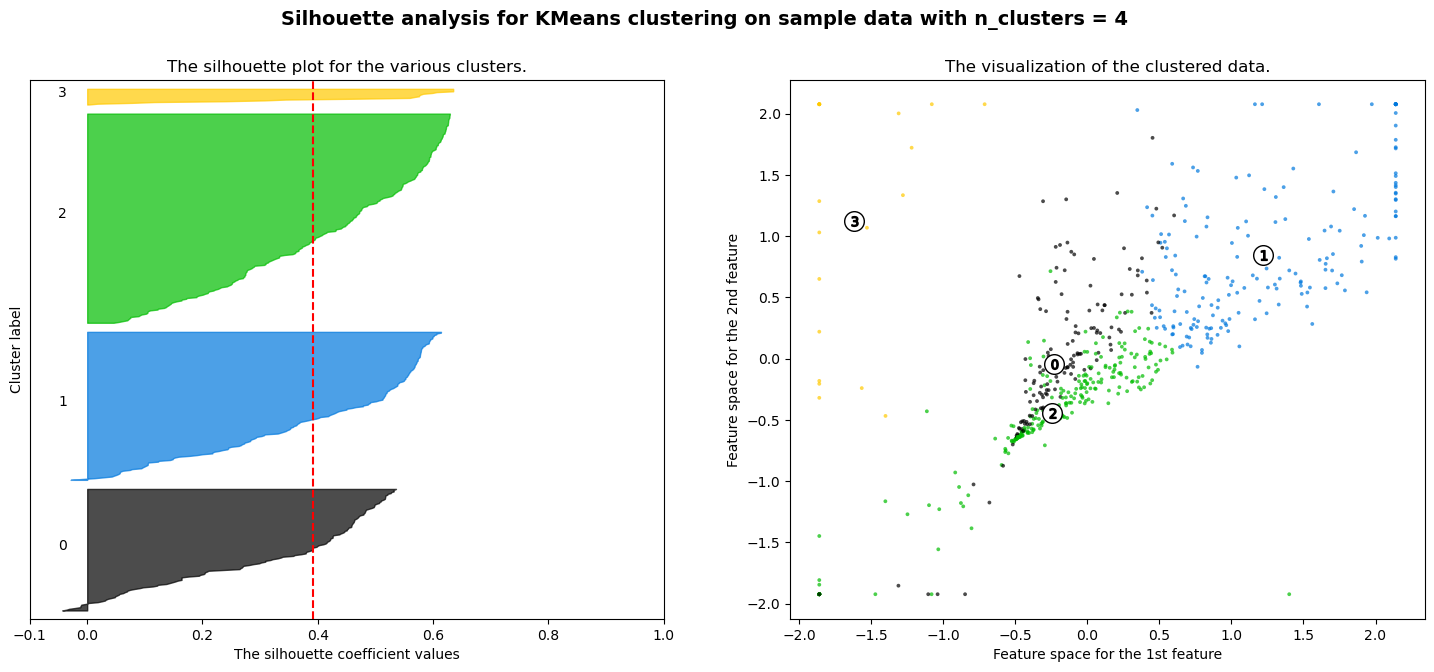

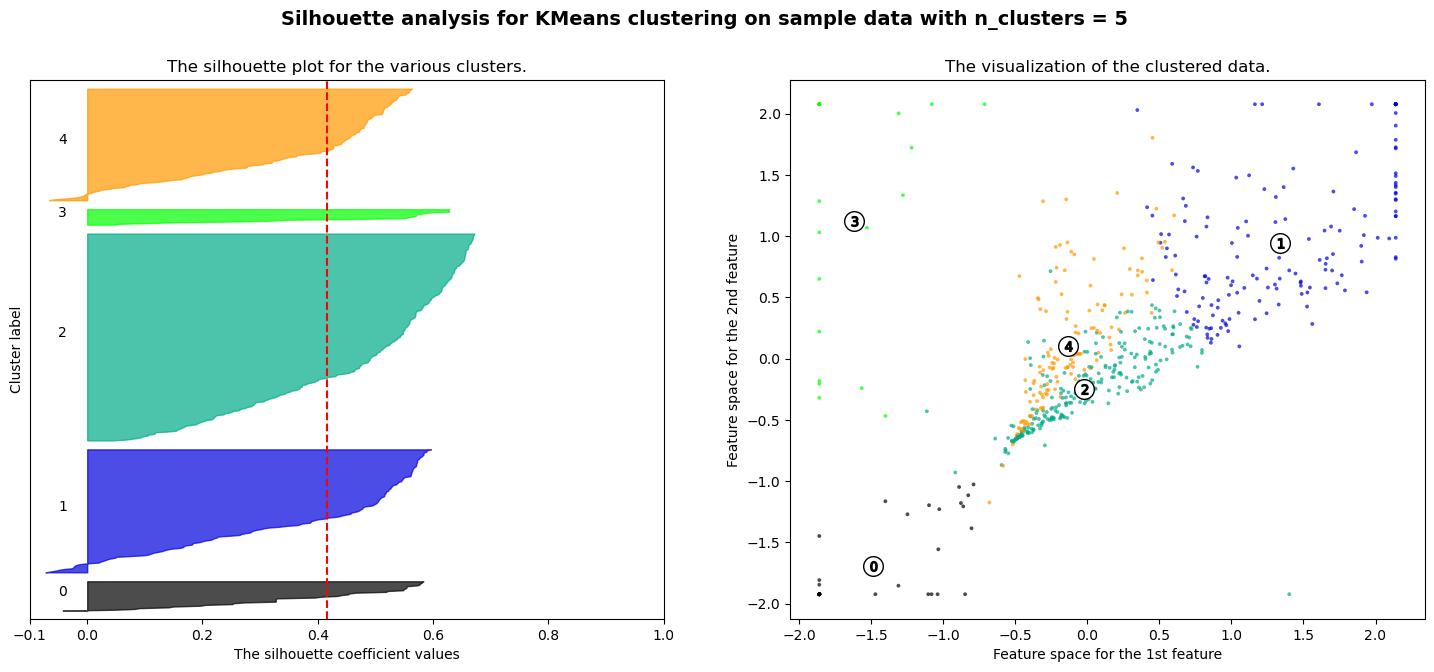

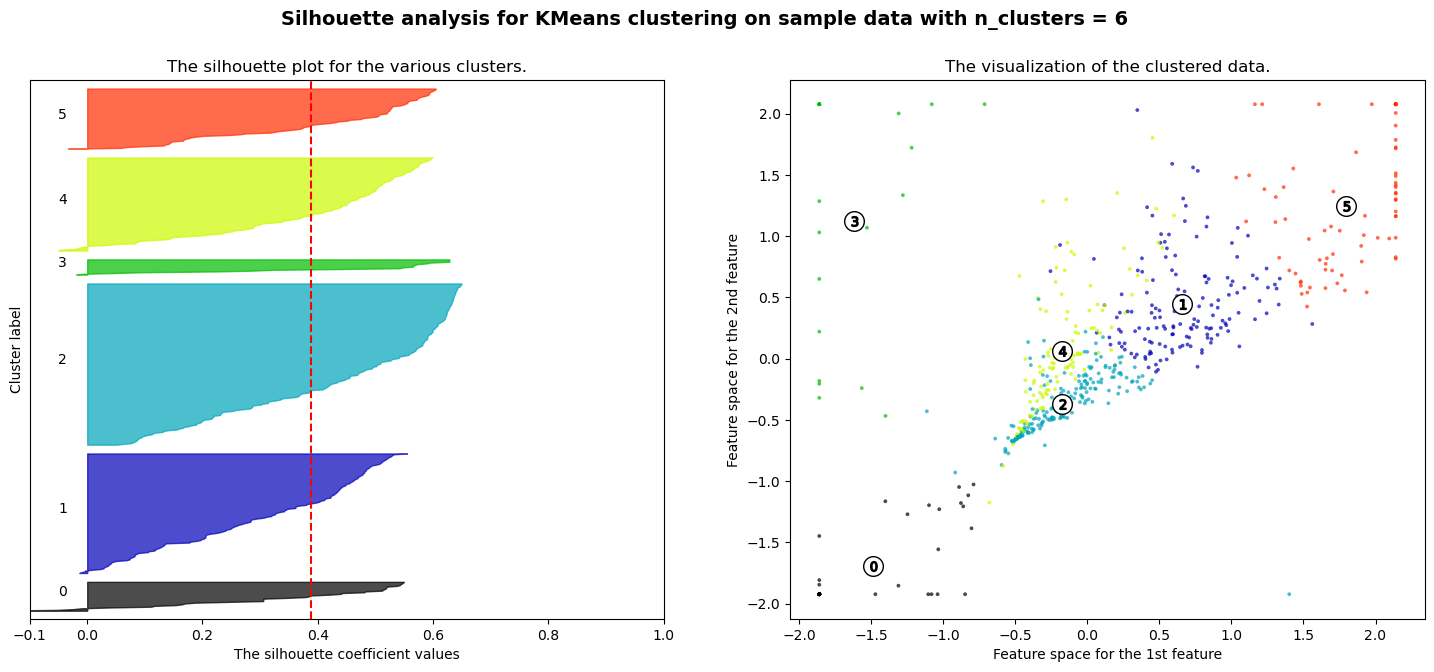

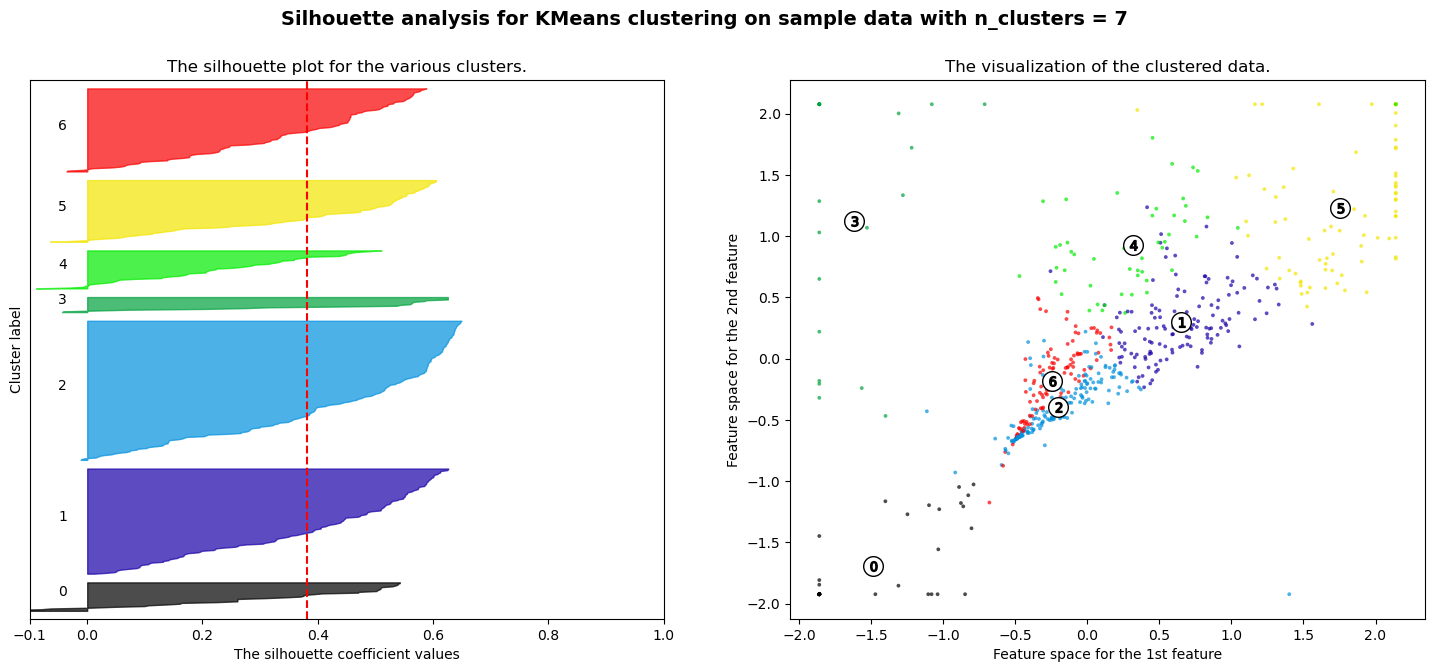

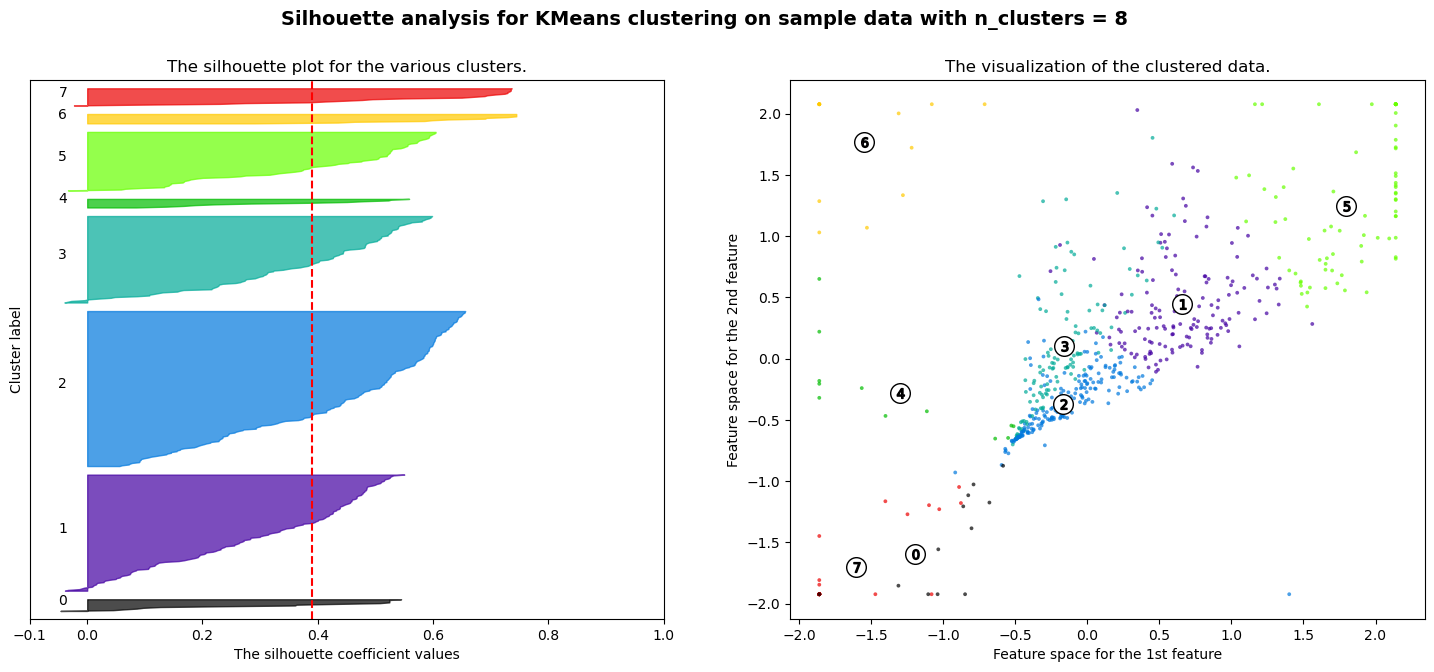

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [ 2, 3, 4 , 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_data[:, 0], scaled_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

With the help of a graphical aid, we can also analyze the results of our clusters, which will help visualize the silhouette score for each point in that particular cluster. 
The value of n_clusters as 2,3,6,7,8 looks to be suboptimal for the given data due to the following reasons:
- Presence of clusters with below average silhouette scores
- Wide fluctuations in the size of the silhouette plots.

The value of 4 and 5 for n_clusters looks to be optimal one. The silhouette score for each cluster is approximately equal to average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. 

# 6.3. Elbow Method

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

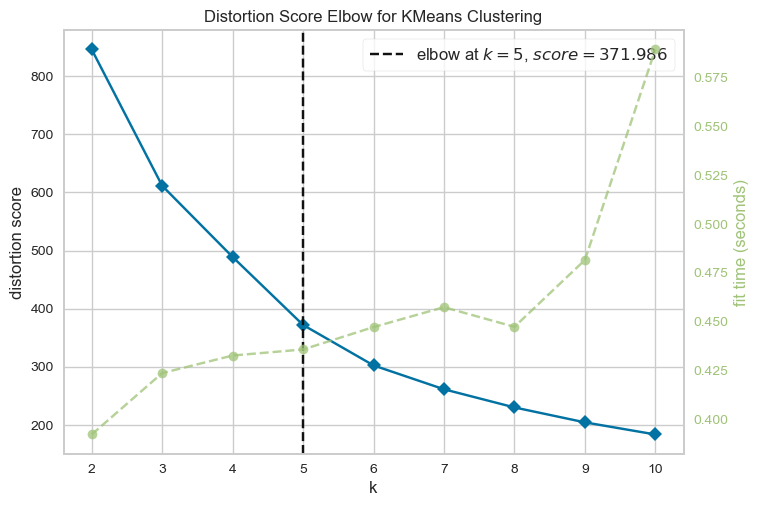

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(scaled_data)    
elb_visualizer.show() 

The Elbow Method plot with a vertical line marking which would be the best number of cluster, in this case, the number is 5. 

# 7. Chart the Clusters

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


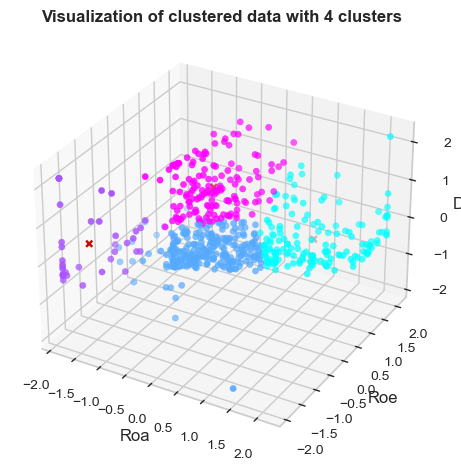

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


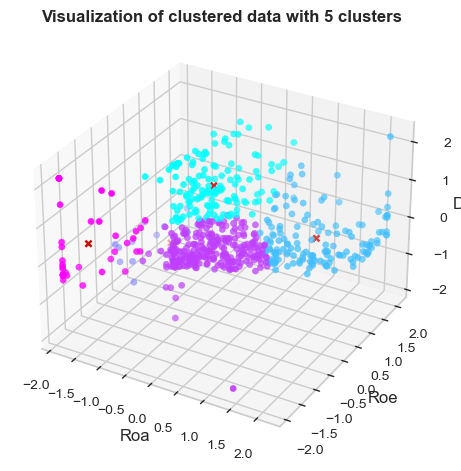

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import numpy as np

clusters = [4, 5]

for cluster in clusters:
    print('-' * 100)
    
    kmeans = KMeans(n_clusters=cluster, random_state=42).fit(scaled_data)
    
    # Define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]
    
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Take the scaled data in this example
    x = scaled_data[:, 0]
    y = scaled_data[:, 1]
    z = scaled_data[:, 2]
    
    # Define the axes labels
    column_names = df4.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])
    
    # Create a scatter plot of the data points
    ax.scatter(x, y, z, c=kmeans.labels_.astype(float), cmap='cool')
    
    # Add the cluster centers as red crosses
    ax.scatter(C1, C2, C3, marker="x", color='r')
    
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')
    
    plt.show()


# 7.1. Show the result of which cluster each observation belongs to

In [32]:
kmeans = results_dict[5]['model']
# Fit the data to the KMeans model
kmeans.fit(scaled_data)

# Predict the cluster labels for the data
cluster_labels = kmeans.predict(scaled_data)

# Create a new DataFrame with the original data and the cluster labels
data_with_clusters = df4.copy()
data_with_clusters['Cluster'] = cluster_labels

# Print the updated DataFrame
print(data_with_clusters)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


                      Roa        Roe         D/E  Cluster
Code                                                     
CHP.HM(WC01706)  7.396778  12.779821   66.623594        3
POM.HM(WC01706)  1.216015   4.944299  234.389621        2
V21.HN(WC01706)  1.106718   3.071449   33.440657        1
LIG.HN(WC01706)  0.985553   7.212689  207.123755        2
MCC.HN(WC01706)  1.818440   2.379671    5.631124        1
...                   ...        ...         ...      ...
IJC.HM(WC01706)  8.595357  17.501906   33.589606        3
DXG.HM(WC01706)  4.095908  13.196450   51.085237        1
ASM.HM(WC01706)  3.304711  11.780293  155.084192        2
KDH.HM(WC01706)  7.780730  10.979191   25.059510        1
LHG.HM(WC01706)  8.799220  17.108194   12.747824        3

[602 rows x 4 columns]


In [33]:
num_clusters = 5

# Create a KMeans object
kmeans = KMeans(n_clusters=num_clusters)

# Fit the data to the KMeans model
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the centroids of each cluster
centroids = kmeans.cluster_centers_

# Create a DataFrame to store the cluster details
cluster_details = pd.DataFrame(columns=['Cluster', 'Centroid', 'Data Points'])

# Iterate over each cluster
for cluster in range(num_clusters):
    # Get the data points belonging to the current cluster
    data_points = scaled_data[cluster_labels == cluster]
    
    # Append the cluster details to the DataFrame
    cluster_details = cluster_details.append({'Cluster': cluster, 'Centroid': centroids[cluster], 'Data Points': data_points}, ignore_index=True)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22456\149369483.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_details = cluster_details.append({'Cluster': cluster, 'Centroid': centroids[cluster], 'Data Points': data_points}, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22456\149369483.py:24: FutureWarning: The frame.append method is deprecated and will be remo

In [34]:
cluster_details

,Cluster,Centroid,Data Points
0,0,"[-0.13315056750653637, 0.095213865522406, 1.35...","[[-0.2875175889876204, -0.284418263327055, 1.6..."
1,1,"[1.3360113500378183, 0.9453419338086183, -0.05...","[[0.7686667417973992, 0.30515941927139395, 0.1..."
2,2,"[-0.01973043120937487, -0.2498701271416473, -0...","[[-0.30619446579367965, -0.42533938882095085, ..."
3,3,"[-1.620581407234336, 1.121670408574556, -1.458...","[[-1.8598146802484319, -0.3199618479683532, -0..."
4,4,"[-1.4839108976792355, -1.6931448352583773, 0.5...","[[-1.0806911137781898, -1.92329085812031, 0.10..."


The provided result shows the details of each cluster in a tabular format. Each row represents a cluster and includes information such as the cluster number, centroid coordinates, and the data points that belong to that cluster.
- Cluster 0: This cluster has a centroid with coordinates [-0.019730431209374927, -0.24987012714164725, ...].
- Cluster 1: This cluster has a centroid with coordinates [1.3360113500378183, 0.9453419338086183, -0.05...]. 
- Cluster 2: This cluster has a centroid with coordinates [-1.4839108976792352, -1.6931448352583773, 0.5...]
- Cluster 3: This cluster has a centroid with coordinates [-0.13315056750653637, 0.095213865522406, 1.35...].
- Cluster 4: This cluster has a centroid with coordinates [-1.6205814072343365, 1.121670408574556, -1.45...].

The centroid value is Roa, Roe, D/E respectively. Due to the code, so the table didn't show full the figure for D/E index. 

# 8. Principal Component Analysis (PCA)

PCA stands for Principal Component Analysis. It is a statistical technique used for dimensionality reduction and data transformation. PCA aims to extract the most important features or patterns from a dataset while minimizing information loss.

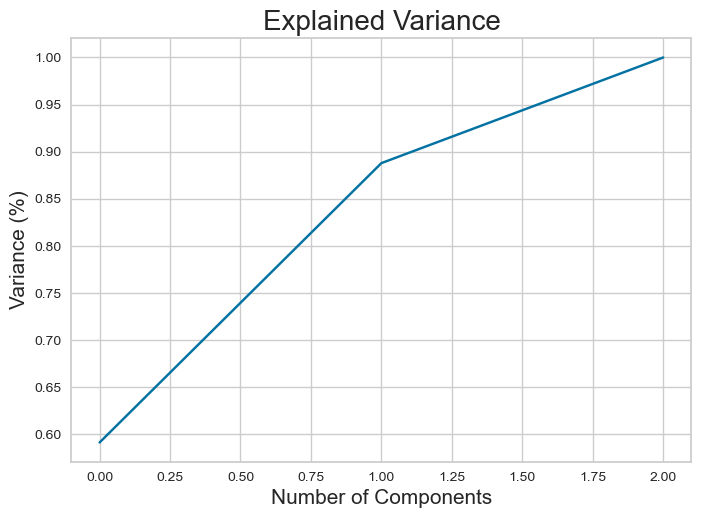

In [35]:
from sklearn.decomposition import PCA

# pass through the scaled data set into our PCA class object
pca = PCA().fit(scaled_data)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

Based on the chart provided, it is evident that we can achieve 100% variance explanation by utilizing only 2 components. Therefore, if we were to apply PCA, we would opt for a component count of 2.

In [36]:
# create a PCA modified dataset
pca_dataset = PCA(n_components=2).fit(scaled_data).transform(scaled_data)

# store it in a new data frame
pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2'])

By running PCA, we have reduced the number of dimensions in our data set from 3 to 2; this means if we graph our new data frame, we will only have two dimensions

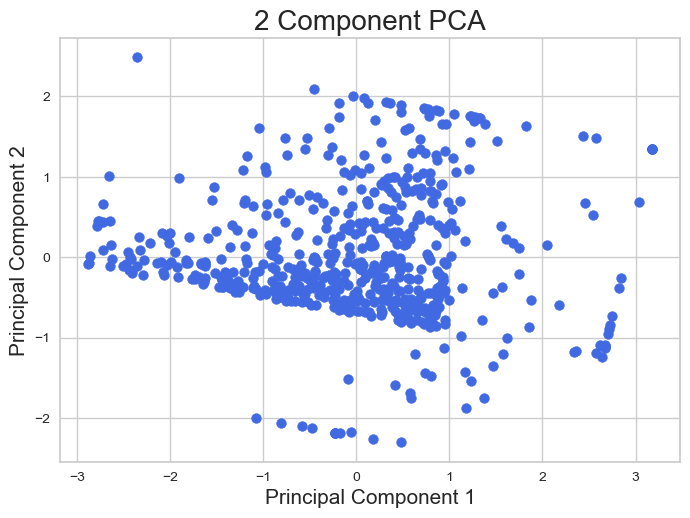

In [37]:
# define a figure
plt.figure()

# define the label and title
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 20)

# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='royalBlue', s = 50)

In [38]:
# define a dictionary that contains all of our relevant info.
results_dict_pca = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict_pca[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict_pca[k]['silhouette_score'] = sil_score
    results_dict_pca[k]['inertia'] = kmeans.inertia_
    results_dict_pca[k]['score'] = kmeans.score
    results_dict_pca[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 2
Silhouette Score: 0.3748584892283885
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 3
Silhouette Score: 0.4036604961665781
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 4
Silhouette Score: 0.42323259246732103
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 5
Silhouette Score: 0.39504039710585664
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 6
Silhouette Score: 0.4106051541445194
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 7
Silhouette Score: 0.41694277130994684
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 8
Silhouette Score: 0.4187405993505654
----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 9
Silhouette Score: 0.42806198735924267


In this case, the best choice of number of cluster is 4,8,9

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


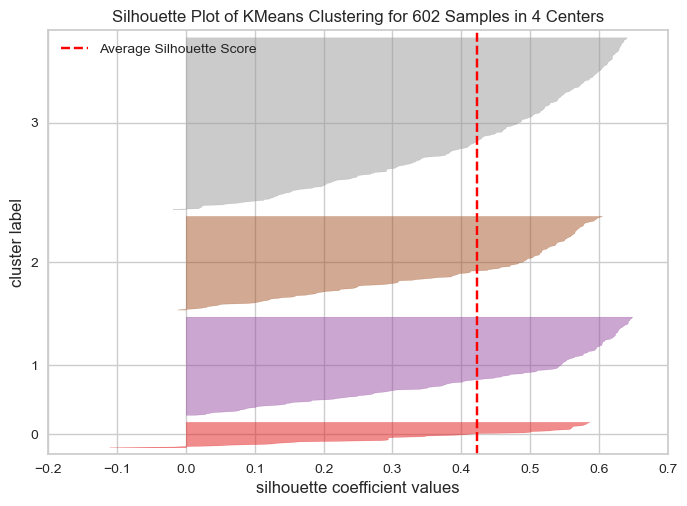

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


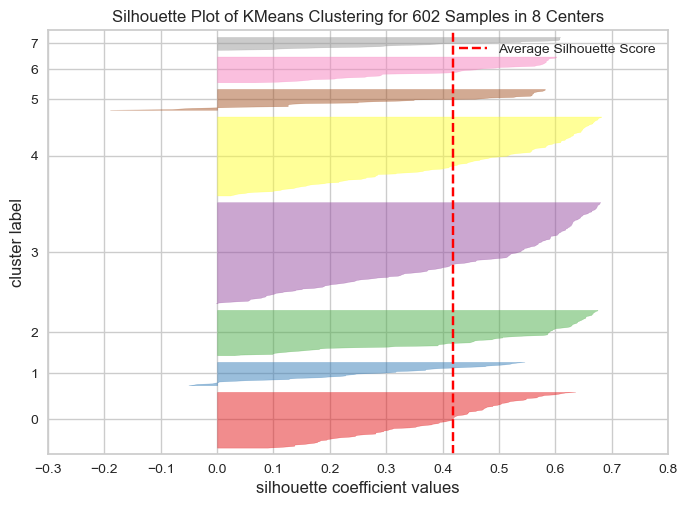

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


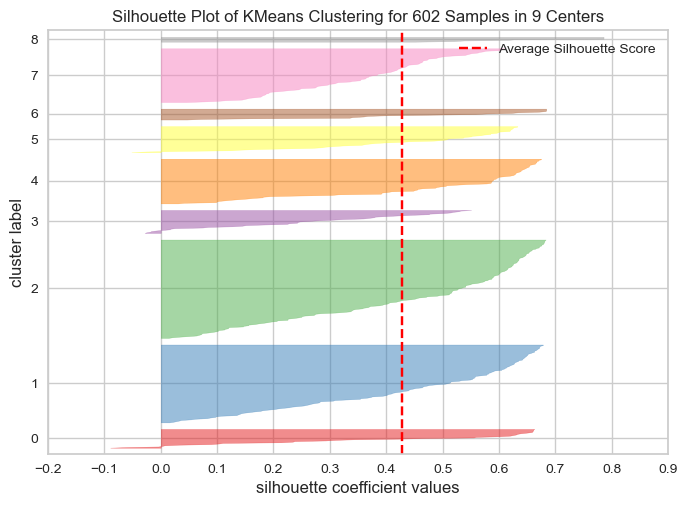

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [4,8,9]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(pca_dataset)

    # show the chart
    visualizer.poof()

Looink at the graph, we can see that the cluster of 4 is better than the others owning to its clearity and the silhouette is also higher the average. 

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


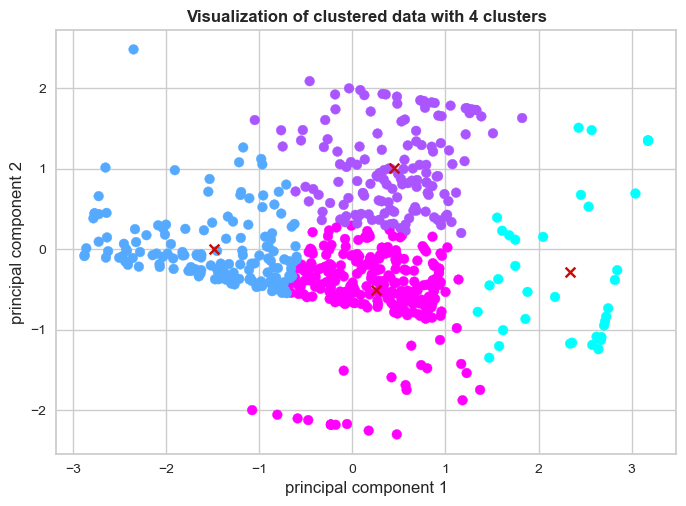

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


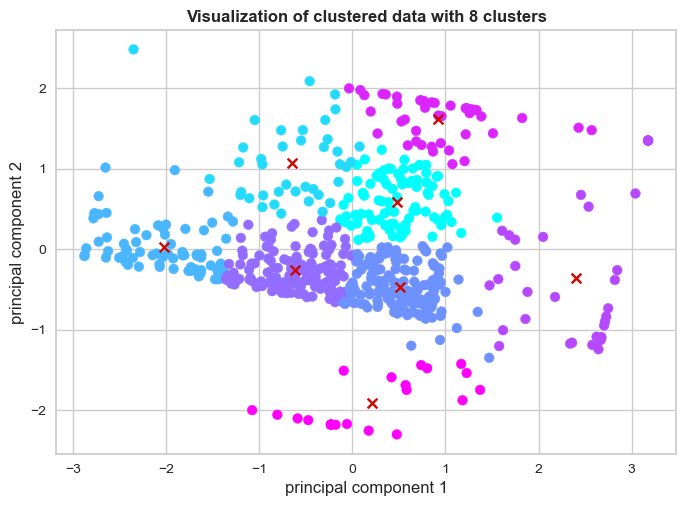

----------------------------------------------------------------------------------------------------


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


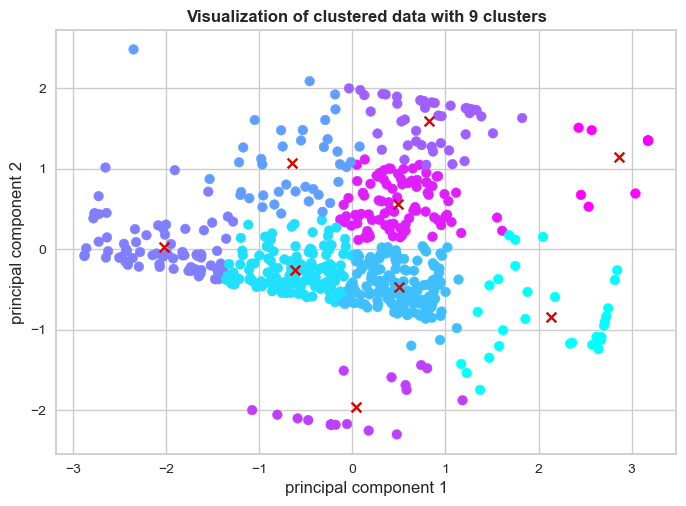

In [40]:
clusters = [4,8,9]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(pca_dataset)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]

    # create a new plot
    plt.figure()

    # take the scaled data in this example.
    x = pca_dataset['principal component 1']
    y = pca_dataset['principal component 2']


    # define the axes labels
    column_names = pca_dataset.columns
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])

    # Visualize it:
    plt.scatter(x, y, c=kmeans.labels_.astype(float), cmap='cool')
    plt.scatter(C1, C2, marker="x", color='r')

    # Plot the clustered data
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')
    plt.show()

# 9.Make Predictions 

# 9.1. Predicting with new data

In [41]:
kmeans = results_dict[5]['model']

In [42]:
# define some test data
test_data = [[0.10, 3.10, 5.20],
             [0.60, 5.10, 2.20],
             [5.2,10.2,15.9],
             [12.5,25.8,29.1],
             [2.5,4.5,7.5]]

# make some predictions, in this case let's pass through our test set.
kmeans.predict(test_data)

array([2, 3, 2, 2, 2])

# 9.2. Predicting with available dataset

In [43]:
datapredict = pd.read_excel('predict_data.xlsx')

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import RobustScaler

# Generate random data for demonstration
x = list(datapredict['Roa'])
y = list(datapredict['Roe'])
z = list(datapredict['D/E'])

# Combine the variables into a 2D array
data = np.column_stack((x, y, z))

# Apply Robust Scaling to the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

# Separate the scaled data back into individual variables
scaled_x = scaled_data[:, 0]
scaled_y = scaled_data[:, 1]
scaled_z = scaled_data[:, 2]

In [45]:
data

array([[ 1.00000000e-01,  3.10000000e+00,  5.20000000e+00],
       [-1.56000999e+01,  9.29048186e+01, -3.49047462e+02],
       [ 1.47624997e+01,  1.65510234e+01,  0.00000000e+00],
       [ 5.26859564e+00,  6.20659029e+00,  5.67000000e+01],
       [ 5.03704963e+00,  6.63523046e+00,  5.60000000e+00],
       [ 2.78690704e+00,  9.47355127e+00,  9.78868220e+01],
       [ 5.52239245e-03,  7.74053468e-03,  1.68018401e+01],
       [ 3.31584327e+00,  6.21498609e+00,  0.00000000e+00],
       [-1.80362133e+00, -9.68322233e+00,  1.28085562e+02],
       [ 7.74466877e-02,  2.05561424e-01,  1.69931795e+01],
       [ 6.76802899e+00,  1.01310073e+01,  2.84898989e+01],
       [ 1.15438532e+00,  2.59082661e+00,  6.19937063e+01],
       [-4.23501860e+00,  3.16045309e+01, -2.98562851e+02],
       [ 1.29605005e+00,  9.37655894e+00,  5.02523870e+02],
       [ 8.64779404e+00,  1.56421554e+01,  5.94791429e+01],
       [ 2.03895159e+00,  3.64486005e+00,  2.52484539e+01],
       [ 3.21839678e+00,  3.98837342e+00

In [46]:
# Preprocess the data
X = data

# grab the model
kmeans = results_dict[5]['model']

# Predict the "Repayment Ability" for the data
predictions = kmeans.predict(X)

# Fill the predictions into the CSV data
datapredict['Cluster'] = predictions

# Save the updated data with predictions to a new CSV file
output_path = 'path_to_save_updated_data.csv'
datapredict.to_csv(output_path, index=False)

In [47]:
datapredict

,Code,Roa,Roe,D/E,Cluster
0,VCB,0.100000,3.100000,5.200000,2
1,HLY.HNO(WC01706),-15.600100,92.904819,-349.047462,4
2,HJS.HN(WC01706),14.762500,16.551023,0.000000,3
3,GMC.HM(WC01706),5.268596,6.206590,56.700000,2
4,VBH.HNO(WC01706),5.037050,6.635230,5.600000,3
5,VC2.HN(WC01706),2.786907,9.473551,97.886822,2
6,TXM.HN(WC01706),0.005522,0.007741,16.801840,2
7,TPH.HN(WC01706),3.315843,6.214986,0.000000,3
8,LTC.HNO(WC01706),-1.803621,-9.683222,128.085562,2
9,MCO.HN(WC01706),0.077447,0.205561,16.993179,2


The new column "Cluster" added show the result of which cluster each observation belongs to.

# Have a nice day !